In [1]:
# import des librairies
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

path = '/home/.../Bureau/PFL'

#### Random Forest classifier

In [2]:
song_train_mem_cat = pd.read_csv('/home/...../ML/song_train_mem_cat.csv')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.cross_validation import cross_val_score

nrow = 2000000

df = song_train_mem_cat.iloc[0:nrow,1:]
X = df[df.columns[df.columns != 'target']]
Y = df.target

Xtr, Xte, Ytr, Yte = train_test_split(X, Y, shuffle=True, test_size=0.2, random_state=42)

#kfold = StratifiedKFold(y=Ytr,  random_state=42)

model = RandomForestClassifier(n_estimators=250, max_depth=25)
results = cross_val_score(model, Xtr, Ytr)
model.fit(Xtr, Ytr)

In [12]:
Ypred = model.predict(Xte)
score = accuracy_score(Ypred,Yte)
print("Random Forest - Train : {}".format(results.mean()))
print("Random Forest - Test : {}".format(score))

Random Forest - Train : 0.692093742046307
Random Forest - Test : 0.6928


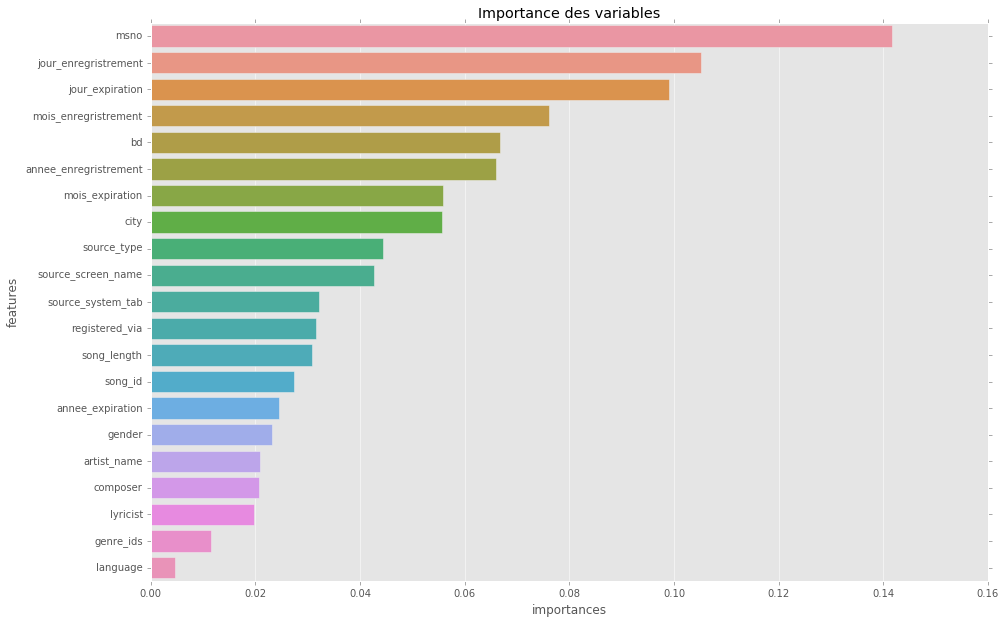

In [13]:
features_importance = model.feature_importances_
db = pd.DataFrame({'features': Xtr.columns, 'importances': features_importance})
db = db.sort_values('importances', ascending=False)

plt.figure(figsize=(15,10))
sns.barplot(x = db.importances, y = db.features)
plt.title('Importance des variables')
plt.show()